# RouteReady

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv("data/Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

## Ordinal Encoding

### Product_importance

In [4]:
df["Product_importance"].value_counts().to_frame()

,count
Product_importance,
low,5297
medium,4754
high,948


In [5]:
def convert_product_importance(value):
    match(value):
        case "low":
            return 0
        case "medium":
            return 1
        case "high":
            return 2
        case _:
            raise("Unidentified Product_importance")

df["Product_importance"] = df["Product_importance"].apply(convert_product_importance)

df["Product_importance"].value_counts().to_frame()

,count
Product_importance,
0,5297
1,4754
2,948


### Gender

In [6]:
df["Gender"].value_counts().to_frame()

,count
Gender,
F,5545
M,5454


In [7]:
df["Gender"] = np.where(df["Gender"]=="F", 0, 1)
df["Gender"].value_counts().to_frame()

,count
Gender,
0,5545
1,5454


## One Hot Encoding

In [8]:
columns_to_encode = ["Warehouse_block", "Mode_of_Shipment"]
encoder = OneHotEncoder(sparse_output=True)
encoded_data = encoder.fit_transform(df[columns_to_encode])

In [66]:
pickle.dump(encoder, open("route_ready_encoder.pickle", "wb"))

In [9]:
encoded_data.shape

(10999, 8)

In [10]:
encoder.get_feature_names_out()

array(['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship'], dtype=object)

In [11]:
df_encoded = pd.DataFrame(data=encoded_data.toarray(),
                          columns=encoder.get_feature_names_out())
df_encoded.head()

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df_merged = pd.merge(df, df_encoded, how="inner", left_index=True, right_index=True)
df_merged.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,D,Flight,4,2,177,3,0,0,44,1233,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,F,Flight,4,5,216,2,0,1,59,3088,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,A,Flight,2,2,183,4,0,1,48,3374,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,B,Flight,3,3,176,4,1,1,10,1177,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,C,Flight,2,2,184,3,1,0,46,2484,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df_merged.drop(columns=["ID", "Warehouse_block", "Mode_of_Shipment"], inplace=True)

In [14]:
df_merged.sample(5)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
5974,4,3,274,2,0,1,1,4762,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4091,4,2,277,5,1,0,8,1335,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,3,5,251,4,1,0,3,5215,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2110,4,5,180,3,0,0,24,1513,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1410,3,4,110,3,0,0,55,1281,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
df_merged.dtypes

Customer_care_calls          int64
Customer_rating              int64
Cost_of_the_Product          int64
Prior_purchases              int64
Product_importance           int64
Gender                       int64
Discount_offered             int64
Weight_in_gms                int64
Reached.on.Time_Y.N          int64
Warehouse_block_A          float64
Warehouse_block_B          float64
Warehouse_block_C          float64
Warehouse_block_D          float64
Warehouse_block_F          float64
Mode_of_Shipment_Flight    float64
Mode_of_Shipment_Road      float64
Mode_of_Shipment_Ship      float64
dtype: object

## Features and Target

In [16]:
df_merged.shape

(10999, 17)

In [17]:
df_merged.drop(columns=["Reached.on.Time_Y.N"]).columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered',
       'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship'],
      dtype='object')

In [18]:
X = df_merged[df_merged.drop(columns=["Reached.on.Time_Y.N"]).columns]
y = df_merged["Reached.on.Time_Y.N"]

X.shape, y.shape

((10999, 16), (10999,))

## Scaling

In [19]:
columns_to_scale = X.columns
scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
X.head()

C:\Users\Jaycp\AppData\Local\Temp\ipykernel_39932\3648377632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,-0.047711,-0.700755,-0.690722,-0.372735,-0.942576,-0.991760,1.889983,-1.468240,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.45248
1,-0.047711,1.421578,0.120746,-1.029424,-0.942576,1.008308,2.815636,-0.333893,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.45248
2,-1.799887,-0.700755,-0.565881,0.283954,-0.942576,1.008308,2.136824,-0.159002,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248
3,-0.923799,0.006689,-0.711529,0.283954,0.616430,1.008308,-0.208162,-1.502484,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248
4,-1.799887,-0.700755,-0.545074,-0.372735,0.616430,-0.991760,2.013404,-0.703244,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.45248


In [67]:
pickle.dump(scaler, open("route_ready_scaler.pickle", "wb"))

## Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((8799, 16), (2200, 16), (8799,), (2200,))

## Model : Random Forest

In [21]:
model = RandomForestClassifier(n_estimators=80,
                              criterion="gini",
                              max_depth=9,
                              random_state=42,
                              warm_start=True,
                              n_jobs=-1)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=80, n_jobs=-1, random_state=42,
                       warm_start=True)

In [22]:
model.score(X_train, y_train)

0.7749744289123764

### Hyperparameter Tuning

In [38]:
%%time

params = {
    "n_estimators":[i for i in range(1, 500, 10)],
    "criterion":["gini", "entropy"],
    "max_depth":[i for i in range(1, 7)]
}

estimator = RandomForestClassifier (
            random_state=42,
            warm_start=True,
)

clf = GridSearchCV (
    estimator=estimator,
    param_grid=params,
    cv=3,
    n_jobs=-1
)

clf.fit(X_train, y_train)

CPU times: total: 20.1 s
Wall time: 2min 23s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(random_state=42, warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91,
                                          101, 111, 121, 131, 141, 151, 161,
                                          171, 181, 191, 201, 211, 221, 231,
                                          241, 251, 261, 271, 281, 291, ...]})

In [39]:
clf.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=301, random_state=42,
                       warm_start=True)

In [40]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 301}

In [41]:
clf.best_score_

np.float64(0.6893965223320832)

In [42]:
model = RandomForestClassifier (
            n_estimators = clf.best_params_["n_estimators"],
            criterion = clf.best_params_["criterion"],
            max_depth = clf.best_params_["max_depth"],
            random_state=42,
            warm_start=True
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=301, random_state=42,
                       warm_start=True)

In [43]:
model.score(X_train, y_train)

0.7159904534606205

In [44]:
model.score(X_test, y_test)

0.6645454545454546

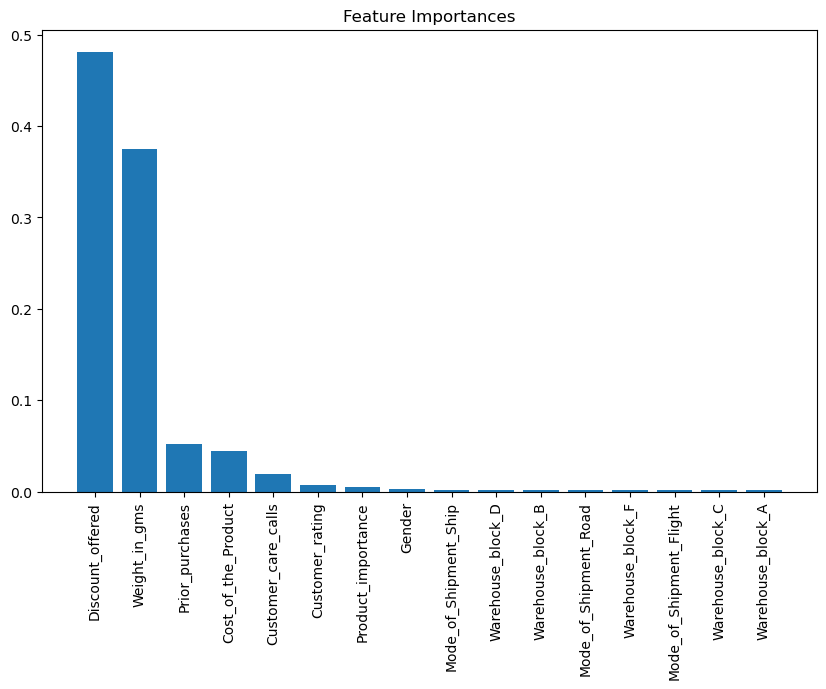

In [51]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.show()

## Baseline

In [46]:
dummy_model = DummyClassifier(
    strategy="uniform",
    random_state=42
)

dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

In [48]:
dummy_model.score(X_train, y_train), dummy_model.score(X_test, y_test)

(0.4964200477326969, 0.49227272727272725)

## Test

In [68]:
df_test = pd.DataFrame(
        data=[["C", "Ship", 5, 5, 239, 6, "medium", "F", 1, 700]],
        columns = df.drop(columns=["ID", "Reached.on.Time_Y.N"]).columns
)
df_test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,C,Ship,5,5,239,6,medium,F,1,700


In [65]:
def predict_new_data(new_data_df):
    
    new_data_df["Product_importance"] = new_data_df["Product_importance"].apply(
        lambda x: 0 if x == 'low' else (1 if x == 'medium' else 2)
    )
    new_data_df["Gender"] = np.where(new_data_df["Gender"]=="F", 0, 1)

    
    columns_to_encode = ["Warehouse_block", "Mode_of_Shipment"]
    encoded_array = encoder.transform(new_data_df[columns_to_encode])
    
    encoded_df = pd.DataFrame(encoded_array.toarray(), 
                              columns=encoder.get_feature_names_out())

    
    df_processed = pd.concat([new_data_df, encoded_df], axis=1)
    df_processed.drop(columns=columns_to_encode, inplace=True) # Assuming ID is in input

    
    df_processed[df_processed.columns] = scaler.transform(df_processed)
    
    return df_processed

processed_input = predict_new_data(df_test)
prediction = model.predict(processed_input)
prediction

array([0])

## Saving model

In [55]:
pickle.dump(model, open("route_ready_rf.pickle", "wb"))

## Pickle model and Streamlit and fastapi